In [7]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

path = '/content/gdrive/My Drive/Colab Notebooks/EAAI21/data/'
checkpoint_path = '/content/gdrive/My Drive/Colab Notebooks/EAAI21/model/'

Mounted at /content/gdrive/


In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

from sklearn import model_selection
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

In [9]:
data = pd.read_csv(path+'solvability.csv')
y = data.loc[:, 'solvability'].to_numpy()
X = data.drop(columns='solvability').to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
num_epochs = 1000
batch_size = 512
dropout = 0.2

# create model
model = Sequential()
# model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='leaky_relu'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='leaky_relu'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='leaky_relu'))
# model.add(Dense(1, kernel_initializer='normal'))
# model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='leaky_relu'))
# model.add(Dense(1, kernel_initializer='normal'))

model.add(Dense(9, input_dim=9, activation='leaky_relu'))
model.add(Dense(1))
model.add(Dense(9, input_dim=9, activation='leaky_relu'))
model.add(Dense(1))
model.add(Dense(9, input_dim=9, activation='leaky_relu'))
model.add(Dense(1))
model.add(Dense(9, input_dim=9, activation='leaky_relu'))
model.add(Dense(1))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path+'dense_lrelu_epoch1000.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(X_train, #input
                  y_train, # labels 
                  batch_size=batch_size, epochs=num_epochs, verbose=1, shuffle=True, validation_split=0.1, callbacks=[cp_callback])

Epoch 1/1000
53/59 [=========================>....] - ETA: 0s - loss: 68145184.0000
Epoch 00001: saving model to /content/gdrive/My Drive/Colab Notebooks/EAAI21/model/dense_lrelu_epoch1000.ckpt
59/59 [==============================] - 2s 11ms/step - loss: 84566160.0000 - val_loss: 67605328.0000
Epoch 2/1000
51/59 [========================>.....] - ETA: 0s - loss: 89191768.0000
Epoch 00002: saving model to /content/gdrive/My Drive/Colab Notebooks/EAAI21/model/dense_lrelu_epoch1000.ckpt
59/59 [==============================] - 1s 9ms/step - loss: 84514872.0000 - val_loss: 67468608.0000
Epoch 3/1000
40/59 [===================>..........] - ETA: 0s - loss: 89091320.0000 
Epoch 00003: saving model to /content/gdrive/My Drive/Colab Notebooks/EAAI21/model/dense_lrelu_epoch1000.ckpt
59/59 [==============================] - 0s 4ms/step - loss: 84142024.0000 - val_loss: 66970864.0000
Epoch 4/1000
58/59 [============================>.] - ETA: 0s - loss: 83574448.0000
Epoch 00004: saving model to 

In [18]:
model.evaluate(X_test, y_test)

515/515 [==============================] - 1s 2ms/step - loss: 48488828.0000


48488828.0

In [27]:
model.evaluate(X_test, y_test)

515/515 [==============================] - 2s 3ms/step - loss: 44366156.0000


44366156.0

In [23]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

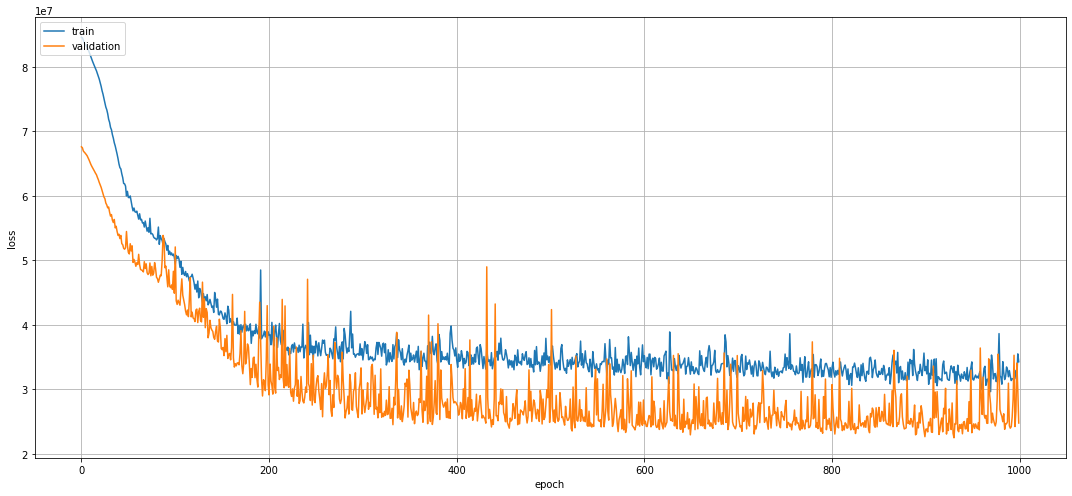

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.title('model loss')
plt.ylabel('loss', )
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.grid()
plt.tight_layout()
plt.savefig(path+'figure1.png', dpi=500)
plt.show()

In [25]:
data.describe()

,xg,xd,xv,ba,bv,c,n_neigh,d,threshold,solvability
count,49901.000000,49901.000000,49901.000000,49901.000000,49901.000000,49901.000000,49901.000000,4.990100e+04,4.990100e+04,49901.000000
mean,0.333643,0.333658,0.332699,49.990452,50.006635,50.000880,49.769644,2.536207e+01,7.225150e-02,876.694375
std,0.236751,0.236053,0.235691,28.922731,28.908090,28.845696,28.755146,1.413994e-12,3.531932e-14,8905.631546
min,0.000021,0.000012,0.000002,0.000685,0.006840,0.003354,0.000000,2.536207e+01,7.225150e-02,0.000000
25%,0.132534,0.133440,0.133500,24.825948,24.884727,25.105742,25.000000,2.536207e+01,7.225150e-02,0.000000
50%,0.291794,0.293893,0.291925,50.157639,49.849820,49.916818,50.000000,2.536207e+01,7.225150e-02,78.000000
75%,0.501680,0.500468,0.499737,75.098688,74.994884,74.946690,75.000000,2.536207e+01,7.225150e-02,394.000000
max,0.994695,0.994780,0.999056,99.998622,99.994960,99.998159,99.000000,2.536207e+01,7.225150e-02,500000.000000
